In [14]:
using Polynomials, LsqFit, Plots

In [38]:
function main()
    
    p0 = [0.5, 0.5] # Guess useful for the non-linear fit
    
    function model(x, coeff) # Trying to fit this model
        coeff[1] * exp.(-coeff[2] *x)
    end
    
    xdata = range(0, stop=10, length=20)
    ydata = model(xdata, [1.0, 2.0]) + 0.01*randn(length(xdata))
    
    #poly_fit(xdata,ydata)
    nlin_fit(model, xdata, ydata, p0)
    
end

main (generic function with 1 method)

In [36]:
function poly_fit(xdata, ydata)
    pfit1= fit(xdata, ydata, 1)
    pfit2= fit(xdata, ydata, 2)
    pfit3= fit(xdata, ydata, 3)
    pfit7= fit(xdata, ydata, 7)
    
    println(typeof(pfit1))
    println(pfit1)
    println(pfit2)
    println(pfit3)
    println(pfit7)
    
       
    
    xlin = range(xdata[1], xdata[end], length=200)
    
    scatter(xdata, ydata, markersize = 3, legend= :topright, label = "data")
    
    
    plot!(xdata, pfit1.(xdata), label = "1st order fitting") # This way (FIT.(x)) enables us to acess the x points and put it on the polynomial
    plot!(xdata, pfit2.(xdata), label = "2nd order fitting")
    plot!(xdata, pfit3.(xdata), label = "3rd order fitting")
    plot!(xdata, pfit7.(xdata), label = "7th order fitting")
    xaxis!("x")
    yaxis!("y")
    title!("Polynomial Fitting")
    
end

poly_fit (generic function with 1 method)

Polynomial{Float64, :x}
0.274873 - 0.0390622*x
0.516921 - 0.192359*x + 0.0153297*x^2
0.720122 - 0.472724*x + 0.0872471*x^2 - 0.00479449*x^3
0.98755 - 1.63746*x + 1.10966*x^2 - 0.39468*x^3 + 0.0798731*x^4 - 0.00924576*x^5 + 0.000569341*x^6 - 1.44393e-5*x^7


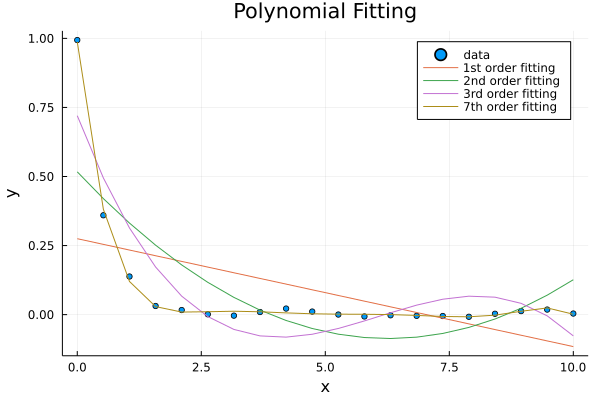

In [37]:
main()

In [39]:
function nlin_fit(model, xdata, ydata, p0)

    nlinfit = curve_fit(model, xdata, ydata, p0)
    pfit = nlinfit.param
    print(pfit)
    
    scatter(xdata, ydata, markersize=3, legend=:topright, label="data")
    plot!(xdata, model(xdata, p0), label = "initial guess")
    plot!(xdata, model(xdata, pfit), linestyle=:dash, label="fitted model")
    

    xaxis!("x")
    yaxis!("y")
    title!("nonlinear fit")
    
end

nlin_fit (generic function with 1 method)

[0.9875821701311362, 1.9474704662039986]

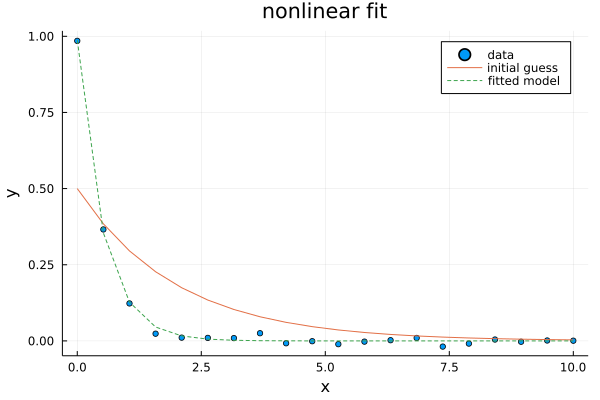

In [40]:
main()

The original code: 

Obs.: (Piecewise case) Interesting part where the xdata is splitted into 2 x_lims, could be useful in the future. Int this present version of the code he fits a certain amount of data using the 3rd order fitting and a certain amount using the first order fitting.

In [6]:
function main()

    # nonlinear fit stuff 
    p0 = [0.5, 0.5]                         # guess
    model(t, p) = p[1] * exp.(-p[2] * t)    # model trying to fit
    model1(t, p) = p[1] * sin.(p[2] * t) + p[3]

    xdata = range(0, stop=10, length=20)
    ydata = model(xdata, [1.0 2.0]) + 0.01*randn(length(xdata))

    #poly_fit(xdata, ydata)
    nlin_fit(model, xdata, ydata, p0)

end

function poly_fit(xdata, ydata)

    pfit1 = fit(xdata, ydata, 1)
    pfit2 = fit(xdata, ydata, 2)
    pfit3 = fit(xdata, ydata, 3)

    xlin = range(xdata[1], xdata[end], length=200)

    # plotting
    scatter(xdata, ydata, markersize=3, legend=:topright, label="data")
    # plot!(xlin, pfit1.(xlin), linestyle=:dash, label="f(x) = x")
    # plot!(xlin, pfit2.(xlin), label="f(x) = x²")
    # plot!(xlin, pfit3.(xlin), label="f(x) = x³", dpi=200)

    pfit1 = fit(xdata[1:5], ydata[1:5], 3)
    pfit2 = fit(xdata[5:end], ydata[5:end], 1)

    plot!(xlin[1:50], pfit1.(xlin[1:50]), label="f(x) = x³")
    plot!(xlin[50:end], pfit2.(xlin[50:end]), label="f(x) = x", dpi=200)

    xaxis!("x")
    yaxis!("y")
    title!("poly fit")

end

function nlin_fit(model, xdata, ydata, p0)

    nlinfit = curve_fit(model, xdata, ydata, p0)
    pfit = nlinfit.param
    print(pfit)
    #xlin = range(xdata[1], xdata[end], length=200)

    #scatter(xdata, ydata, markersize=3, legend=:topright, label="data")
    #plot!(xlin, model(xlin, [p0[1], p0[2]]), label="initial model")
    #plot!(xlin, model(xlin, [pfit[1], pfit[2]]), linestyle=:dash, label="fitted model", dpi=200)

    #xaxis!("x")
    #yaxis!("y")
    #title!("nonlinear fit")

end


main()

[0.9900859959602448, 1.9729973906757916]